# МГТУ им. Н.Э.Баумана | ИУ5 | 6 семестр | ТМО | РК№2

#### ИУ5-63Б | Нагапетян Валерий | Вариант № 15
<b>Заданиe</b>: https://github.com/ugapanyuk/courses_current/wiki/TMO_RK_2

<b>Датасет</b>: https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project

<b>Задание</b>:  Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

<b>Метод №1</b>: Дерево решений
<b>Метод №2</b>: Случайный лес

### Импорт библиотек

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Загрузка данных и первичный анализ

In [52]:
# Загрузка данных
df = pd.read_csv("states_all.csv")

# Вывод информации о датасете
print("Информация о датасете:")
df.info()

# Просмотр первых 5 строк
print("\nПервые 5 строк данных:")
print(df.head())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-

### Анализ и обработка пропусков

In [53]:
print("\nКоличество пропусков по столбцам:")
print(df.isnull().sum())

# Удаление строк, где целевая переменная AVG_MATH_8_SCORE отсутствует
df = df.dropna(subset=['AVG_MATH_8_SCORE'])

# Заполнение пропусков в числовых признаках медианой
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Проверка, что пропусков нет
print("\nПропуски после обработки:")
print(df.isnull().sum())


Количество пропусков по столбцам:
PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

Пропуски после обработки:


### Подготовка данных

In [54]:
# Удаление ненужных столбцов
df.drop(['PRIMARY_KEY', 'STATE'], axis=1, inplace=True)

# Выбор признаков и целевой переменной
features = [
    'TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 
    'GRADES_ALL_G', 'ENROLL'
]
target = 'AVG_MATH_8_SCORE'

# Разделение на train/test
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Дерево решений

In [55]:
# Обучение модели
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Предсказание и оценка
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree:")
print(f"MSE = {mse_dt:.2f}, R² = {r2_dt:.2f}")


Decision Tree:
MSE = 57.58, R² = 0.38


### Случайный лес

In [56]:
# Обучение модели
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказание и оценка
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"MSE = {mse_rf:.2f}, R² = {r2_rf:.2f}")


Random Forest:
MSE = 39.89, R² = 0.57


### Визуализация важности признаков

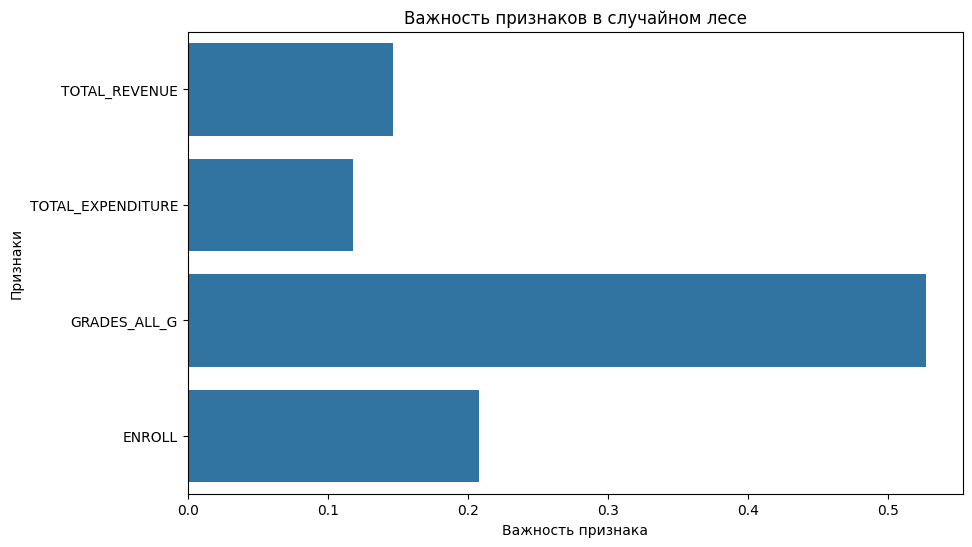

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=features)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в случайном лесе')
plt.show()

Для оценки качества моделей Random Forest и Decision Tree использовались метрики MSE (среднеквадратичная ошибка) и R² (коэффициент детерминации). Random Forest показал результаты: MSE = 39.89, R² = 0.57, что означает, что модель объясняет 57% дисперсии данных. Decision Tree работал хуже: MSE = 57.58, R² = 0.38, что говорит о переобучении или недостатке информации в данных.

Вывод: Random Forest справляется лучше, но требует доработок — например, добавления признаков или настройки гиперпараметров. Decision Tree оказался слишком слабым для этой задачи. Для улучшения результатов стоит проверить данные на выбросы и попробовать другие алгоритмы, например, градиентный бустинг.